In [ ]:
# --- Importaciones ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# --- Cargar datos ---
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target



In [ ]:


# --- NumPy: Estadísticas básicas ---
# Crear un array manual con np.array
sepal_lengths = np.array(df['sepal length (cm)'])
# Calcular media, mediana, desviación típica de una columna del dataset
print("Media de longitud del sépalo:", np.mean(sepal_lengths))
print("Desviación típica:", np.std(sepal_lengths))
print("Mediana:", np.median(sepal_lengths))



Media de longitud del sépalo: 5.843333333333334
Desviación típica: 0.8253012917851409
Mediana: 5.8


In [3]:
# --- Pandas: Exploración ---
# Devolver las primeras n filas (por defecto, n=5)
print(df.head())
# Generar estadísticas
print(df.describe())
# Filtrar por clase
print("\nFiltrado por clase 0 (setosa):")
print(df[df["target"] == 0])
# Agrupar por clase y hacer media
print("\nMedia por clase:")
print(df.groupby("target").mean())



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

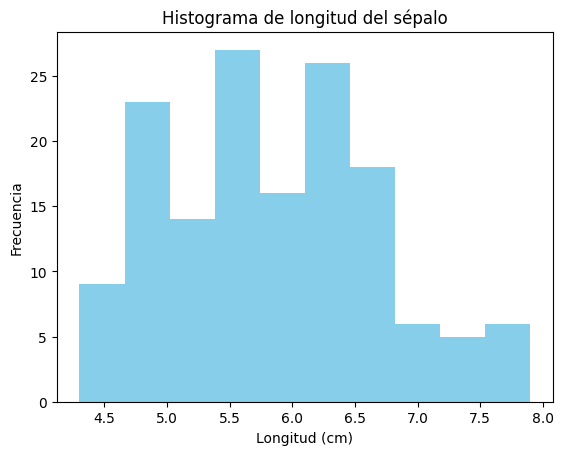

In [4]:
# --- Matplotlib: Visualizaciones ---
# Histograma
plt.hist(df['sepal length (cm)'], bins=10, color='skyblue')
plt.title('Histograma de longitud del sépalo')
plt.xlabel('Longitud (cm)')
plt.ylabel('Frecuencia')
plt.show()





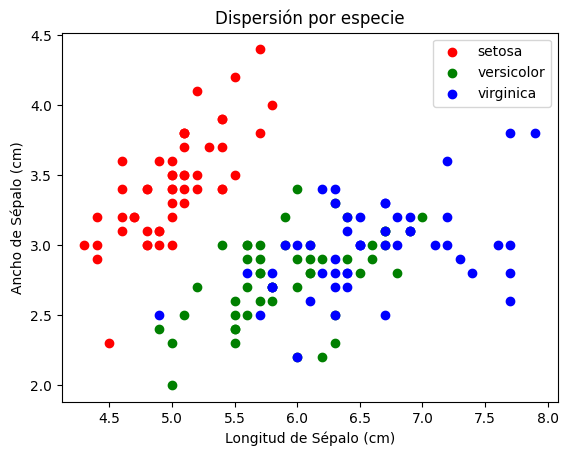

In [5]:
# Scatter plot
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(df[df['target'] == i]['sepal length (cm)'],
                df[df['target'] == i]['sepal width (cm)'],
                label=iris.target_names[i], color=colors[i])
plt.xlabel('Longitud de Sépalo (cm)')
plt.ylabel('Ancho de Sépalo (cm)')
plt.title('Dispersión por especie')
plt.legend()
plt.show()

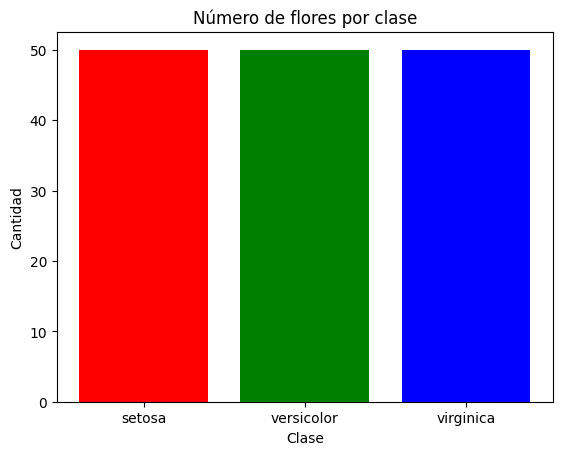

In [6]:
# Gráfico de barras
counts = df['target'].value_counts()
labels = [iris.target_names[i] for i in counts.index]

plt.bar(labels, counts, color=['red', 'green', 'blue'])
plt.title('Número de flores por clase')
plt.ylabel('Cantidad')
plt.xlabel('Clase')
plt.show()



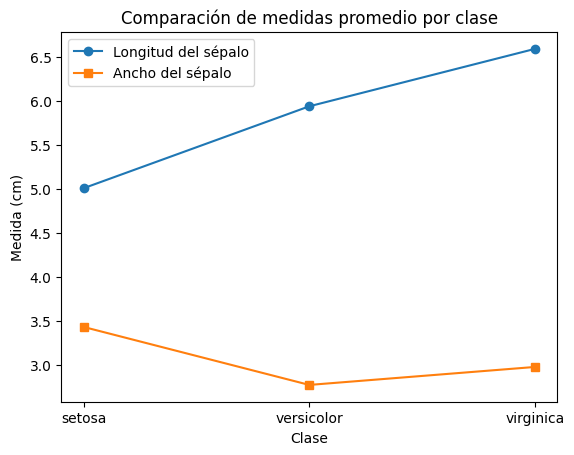

In [7]:
# Gráfico de líneas
grouped_means = df.groupby('target')[['sepal length (cm)', 'sepal width (cm)']].mean()
labels = [iris.target_names[i] for i in grouped_means.index]

plt.plot(labels, grouped_means['sepal length (cm)'], label='Longitud del sépalo', marker='o')
plt.plot(labels, grouped_means['sepal width (cm)'], label='Ancho del sépalo', marker='s')
plt.title('Comparación de medidas promedio por clase')
plt.ylabel('Medida (cm)')
plt.xlabel('Clase')
plt.legend()
plt.show()



C:\Users\alfon\AppData\Local\Temp\ipykernel_13184\2997297266.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=iris.target_names)


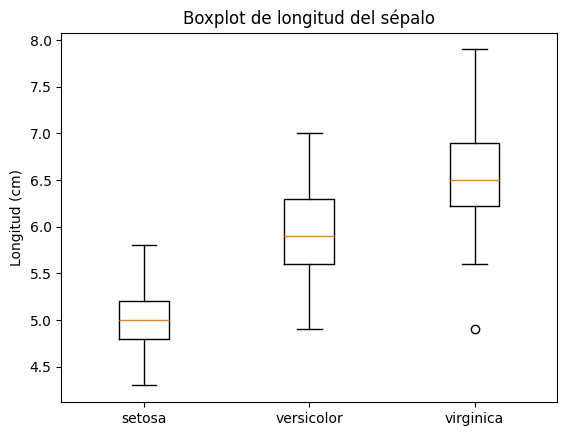

In [8]:
# Boxplot
data = [df[df['target'] == i]['sepal length (cm)'] for i in range(3)]
plt.boxplot(data, labels=iris.target_names)
plt.title('Boxplot de longitud del sépalo')
plt.ylabel('Longitud (cm)')
plt.show()

In [9]:
# --- Scikit-learn: Modelo simple ---
X = df.drop("target", axis=1)
y = df["target"]
# Dividir conjunto de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Usar un modelo de aprendizaje supervisado
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Evaluar el rendimiento del modelo
y_pred = model.predict(X_test)
print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Precisión del modelo: 1.0

Matriz de confusión:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
